### Import modules

In [6]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [7]:
# Define study
STUDY_NAME = "tune_scan_start_of_collapse_flat_pos_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.328      base_collider                             7.250   
             60.329      base_collider                             6.125   
      62.306 60.328      base_collider                             6.969   
             60.329      base_collider                             6.094   
      62.307 60.327      base_collider                             7.906   
             60.328      base_collider                             6.938   
             60.329      base_collider                             6.281   
      62.308 60.328      base_collider                             7.031   
             60.329      base_collider                             6.219   
      62.309 60.328      base_collider                             6.844   
             60.329      base_collider                             6.062   
      62.310 60.328      base_collider                             7.188   
             60.329      base_collider                             6.219   
      62.311 60.328      base_collider                             7.062   
             60.329      base_collider                             6.312   
      62.312 60.327      base_collider                             7.844   
             60.328      base_collider                             7.281   
             60.329      base_collider                             6.094   
      62.313 60.328      base_collider                             7.156   
             60.329      base_collider                             6.500   
      62.314 60.328      base_collider                             7.219   
             60.329      base_collider                             6.156   
      62.315 60.328      base_collider                             7.188   
             60.329      base_collider                             6.875   
      62.316 60.328      base_collider                             7.250   
             60.329      base_collider                             7.000   
      62.317 60.328      base_collider                             7.344   
             60.329      base_collider                             6.656   
      62.318 60.328      base_collider                             7.125   
             60.329      base_collider                             7.062   
      62.319 60.328      base_collider                             7.344   
             60.329      base_collider                             6.125   
      62.320 60.328      base_collider                             7.188   
             60.329      base_collider                             6.750   
      62.321 60.328      base_collider                             6.812   
             60.329      base_collider                             6.125   
      62.322 60.327      base_collider                             7.562   
             60.328      base_collider                             7.125   
             60.329      base_collider                             6.062   
      62.323 60.327      base_collider                             7.094   
             60.328      base_collider                             6.719   
             60.329      base_collider                             4.844   
      62.324 60.328      base_collider                             5.625   
             60.329      base_collider                             5.531   
      62.325 60.329      base_collider                             4.000   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.328  62.305  60.328  15.0  15.0       150.0       147.0   
             60.329  62.305  60.329  15.0  15.0       150.0       147.0   
      62.306 60.328  62.306  60.328  15.0  15.0       150.0       147.0   
             60.329  62.306  60.329  15.0  15.0       150.0       147.0 

In [8]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.327,NaN,NaN,7.906,NaN,NaN,NaN,NaN,7.844,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.562,7.094,NaN,NaN
60.328,7.250,6.969,6.938,7.031,6.844,7.188,7.062,7.281,7.156,7.219,...,7.25,7.344,7.125,7.344,7.188,6.812,7.125,6.719,5.625,NaN
60.329,6.125,6.094,6.281,6.219,6.062,6.219,6.312,6.094,6.500,6.156,...,7.00,6.656,7.062,6.125,6.750,6.125,6.062,4.844,5.531,4.0


In [9]:
import numpy as np
array_qx = np.round(np.arange(62.305, 62.330, 0.001), decimals=4)
array_qy = np.round(np.arange(60.305, 60.330, 0.001), decimals=4)

# Replace NaNs above the upper diagonal with 8
for qx in array_qx:
    for qy in array_qy:
        if qy >= qx - 2 + 0.004:
            if qx in df_to_plot.columns and qy in df_to_plot.index:
                if pd.isna(df_to_plot.loc[qy, qx]):
                    df_to_plot.loc[qy, qx] = 8
            else:
                df_to_plot.loc[qy, qx] = 8
                
# Sort indices by increasing qy
df_to_plot = df_to_plot.sort_index(ascending=True)

# Sort columns by increasing qx
df_to_plot = df_to_plot.sort_index(axis=1, ascending=True)

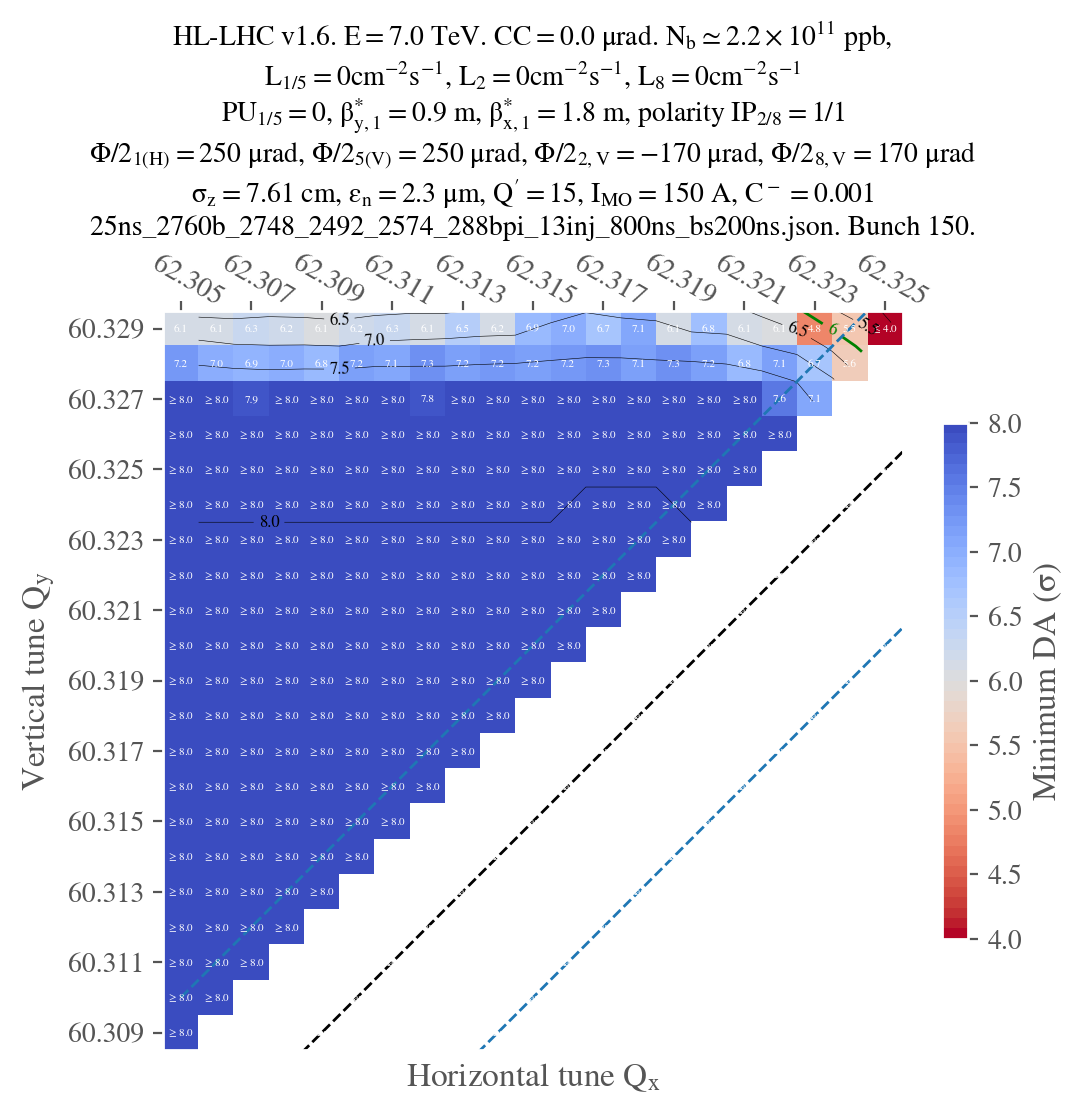

In [10]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.9,
    bety=1.8,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified